trying out python's [scholarly](https://pypi.org/project/scholarly/) library and following documentation.

In [31]:
# google scholar
from scholarly import scholarly
import json
import ast
# network graph
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#print(next(scholarly.search_author('Tuomas Sandholm')))
print(next(scholarly.search_author('C. Grace Haaf')))

{'affiliation': 'Doctoral student at Carnegie Mellon University',
 'citedby': 60,
 'email': '@andrew.cmu.edu',
 'filled': False,
 'id': 'OG1A914AAAAJ',
 'interests': ['C. Grace Haaf'],
 'name': 'C. Grace Haaf',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=OG1A914AAAAJ'}


In [3]:
# Retrieve the author's data, fill-in, and print
search_query = scholarly.search_author('C. Grace Haaf')
author = next(search_query).fill()
print(author)

{'affiliation': 'Doctoral student at Carnegie Mellon University',
 'citedby': 60,
 'citedby5y': 53,
 'cites_per_year': {2013: 2,
                    2014: 5,
                    2015: 5,
                    2016: 11,
                    2017: 10,
                    2018: 8,
                    2019: 13,
                    2020: 6},
 'coauthors': [{'affiliation': 'Carnegie Mellon University',
 'filled': False,
 'id': '92jyX2EAAAAJ',
 'name': 'Jeremy J. Michalek'},
               {'affiliation': 'Stanford Graduate School of Business',
 'filled': False,
 'id': 'J7GJsUAAAAAJ',
 'name': 'William Ross Morrow'},
               {'affiliation': 'Associate Professor, Energy Resources Engineering - Stanford '
                'University',
 'filled': False,
 'id': 'f2yeR2QAAAAJ',
 'name': 'Inês Lima Azevedo'},
               {'affiliation': 'Drexel University',
 'filled': False,
 'id': 'tZ7edOoAAAAJ',
 'name': 'Elea McDonnell Feit'}],
 'email': '@andrew.cmu.edu',
 'filled': False,
 'hindex': 3,


## Getting list of coauthor names

In [4]:
search_query = scholarly.search_author('C. Grace Haaf')
coauthors = next(search_query).fill(['coauthors'])
coauthors

{'affiliation': 'Doctoral student at Carnegie Mellon University',
 'citedby': 60,
 'coauthors': [{'affiliation': 'Carnegie Mellon University',
 'filled': False,
 'id': '92jyX2EAAAAJ',
 'name': 'Jeremy J. Michalek'},
               {'affiliation': 'Stanford Graduate School of Business',
 'filled': False,
 'id': 'J7GJsUAAAAAJ',
 'name': 'William Ross Morrow'},
               {'affiliation': 'Associate Professor, Energy Resources Engineering - Stanford '
                'University',
 'filled': False,
 'id': 'f2yeR2QAAAAJ',
 'name': 'Inês Lima Azevedo'},
               {'affiliation': 'Drexel University',
 'filled': False,
 'id': 'tZ7edOoAAAAJ',
 'name': 'Elea McDonnell Feit'}],
 'email': '@andrew.cmu.edu',
 'filled': False,
 'id': 'OG1A914AAAAJ',
 'interests': ['C. Grace Haaf'],
 'name': 'C. Grace Haaf',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=OG1A914AAAAJ'}

Problem: returns a dictionary like object based on scholarly and difficult to access

Attempts: converting it to string, can't convert it to dict
    
Solution: convert string to dictionary: `ast.literal_eval(dict_string)`

In [5]:
coauthor_dict = ast.literal_eval(str(coauthors))
coauthor_dict

{'affiliation': 'Doctoral student at Carnegie Mellon University',
 'citedby': 60,
 'coauthors': [{'affiliation': 'Carnegie Mellon University',
   'filled': False,
   'id': '92jyX2EAAAAJ',
   'name': 'Jeremy J. Michalek'},
  {'affiliation': 'Stanford Graduate School of Business',
   'filled': False,
   'id': 'J7GJsUAAAAAJ',
   'name': 'William Ross Morrow'},
  {'affiliation': 'Associate Professor, Energy Resources Engineering - Stanford University',
   'filled': False,
   'id': 'f2yeR2QAAAAJ',
   'name': 'Inês Lima Azevedo'},
  {'affiliation': 'Drexel University',
   'filled': False,
   'id': 'tZ7edOoAAAAJ',
   'name': 'Elea McDonnell Feit'}],
 'email': '@andrew.cmu.edu',
 'filled': False,
 'id': 'OG1A914AAAAJ',
 'interests': ['C. Grace Haaf'],
 'name': 'C. Grace Haaf',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=OG1A914AAAAJ'}

In [6]:
coauthor_dict_list = coauthor_dict['coauthors']
coauthor_dict_list

[{'affiliation': 'Carnegie Mellon University',
  'filled': False,
  'id': '92jyX2EAAAAJ',
  'name': 'Jeremy J. Michalek'},
 {'affiliation': 'Stanford Graduate School of Business',
  'filled': False,
  'id': 'J7GJsUAAAAAJ',
  'name': 'William Ross Morrow'},
 {'affiliation': 'Associate Professor, Energy Resources Engineering - Stanford University',
  'filled': False,
  'id': 'f2yeR2QAAAAJ',
  'name': 'Inês Lima Azevedo'},
 {'affiliation': 'Drexel University',
  'filled': False,
  'id': 'tZ7edOoAAAAJ',
  'name': 'Elea McDonnell Feit'}]

In [7]:
coauthor_names = []
for coauthor in coauthor_dict_list:
    coauthor_names.append(coauthor['name'])
coauthor_names

['Jeremy J. Michalek',
 'William Ross Morrow',
 'Inês Lima Azevedo',
 'Elea McDonnell Feit']

In [35]:
n = len(coauthor_names)
test = pd.DataFrame({ 'from':['C. Grace Haaf']*n, 
                      'to':coauthor_names})
test

,from,to
0,C. Grace Haaf,Jeremy J. Michalek
1,C. Grace Haaf,William Ross Morrow
2,C. Grace Haaf,Inês Lima Azevedo
3,C. Grace Haaf,Elea McDonnell Feit


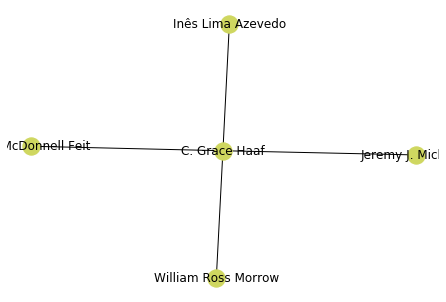

In [36]:
# Build your graph
#G=nx.from_pandas_dataframe(df, 'from', 'to')
G=nx.from_pandas_edgelist(test, 'from', 'to')
# Plot it
nx.draw(G, with_labels=True, node_color='#cfd760')
plt.show()

## Getting list of publication titles

In [8]:
# Print the titles of the author's publications
print([pub.bib['title'] for pub in author.publications])

['Sensitivity of Vehicle Market Share Predictions to Discrete Choice Model Specification', 'Robust design for profit maximization with aversion to downside risk from parametric uncertainty in consumer choice models', 'Forecasting light-duty vehicle demand using alternative-specific constants for endogeneity correction versus calibration', 'Vehicle Demand Forecasting with Discrete Choice Models: 2 Logit 2 Quit']


In [9]:
# Take a closer look at the first publication
pub = author.publications[0].fill()
print(pub)

{'bib': {'abstract': 'When design decisions are informed by consumer choice '
                     'models, uncertainty in choice model predictions creates '
                     'uncertainty for the designer. We investigate the '
                     'variation and accuracy of market share predictions by '
                     'characterizing fit and forecast accuracy of discrete '
                     'choice models for the US light duty new vehicle market. '
                     'Specifically, we estimate multinomial logit models for '
                     '9000 utility functions representative of a large '
                     'literature in vehicle choice modeling using sales data '
                     'for years 2004–2006. Each model predicts shares for the '
                     '2007 and 2010 markets, and we compare several '
                     'quantitative measures of model fit and predictive '
                     'accuracy. We find that (1) our accuracy measures are '
  

In [10]:
# Which papers cited that publication?
print([citation.bib['title'] for citation in pub.citedby])

Exception: Cannot fetch the page from Google Scholar.